In [1]:
import os
import pandas as pd 
import numpy as np 

# Data preprocessors
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAvgPool1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Visualization
import matplotlib.pyplot as plt

# Dumping
import joblib 

In [2]:
# import local module found in another folder
import sys
sys.path.append('../')
from preprocessing import preprocessing_pipeline

In [3]:
# Visualization function

def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [4]:
# Data extraction function
def extract_data(DATA_PATH):
    files = [file for file in os.listdir(DATA_PATH) if os.path.isfile(os.path.join(DATA_PATH, file))]
    combined_data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(DATA_PATH, file)
        df = pd.read_csv(file_path, delimiter='\t')
        combined_data = pd.concat([combined_data, df], ignore_index=True)
    return combined_data

In [ ]:
# Data extraction function
def extract_data(DATA_PATH):
    files = [file for file in os.listdir(DATA_PATH) if os.path.isfile(os.path.join(DATA_PATH, file))]
    combined_data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(DATA_PATH, file)
        df = pd.read_csv(file_path, delimiter='\t')
        combined_data = pd.concat([combined_data, df], ignore_index=True)
    return combined_data

In [11]:
# Modify the path and extract the data
data_path = '../data/'
data = extract_data(DATA_PATH=data_path)

In [12]:
data = shuffle(data)
data = data.dropna()
data.head()

,headline,content,category,date,link
2571,Balaa Ibiddaa Ameerikaa bulchiinsa Hawaayitti ...,Balaa Ibiddaa Ameerikaa bulchiinsa Hawaayitt...,idil_addunyaa,2023-08-12,https://www.fanabc.com/afaanoromoo/balaa-ibidd...
531,Diinagdee hunda galeessaan fayyadamummaa ummat...,Diinagdee hunda galeessaan fayyadamummaa umm...,biiznasii,2023-10-09,https://www.fanabc.com/afaanoromoo/diinagdee-h...
1839,Jilli Dooktar Liyaa Taaddasaatin durfamu hospi...,- Jilli Ministira Ministeera Fayyaa Dooktar Li...,fayyaa,2021-10-21,https://www.fanabc.com/afaanoromoo/jilli-dookt...
236,Dhaabbileen Ityoophiyaa buhaa kalloo fi uffata...,Dhaabbileen Ityoophiyaa buhaa kalloo fi uffa...,biiznasii,2021-01-29,https://www.fanabc.com/afaanoromoo/dhaabbileen...
4747,Roonaaldoon Maanchisteer Yuunaayitiiditti maka...,Kiristiyaanoo Roonaaldoon Maanchisteer Yuuna...,ispoortii,2021-08-27,https://www.fanabc.com/afaanoromoo/roonaaldoon...


In [13]:
data["text"] = (data["headline"] + data["content"]).apply(preprocessor.preprocess)

In [14]:
data.head()

,headline,content,category,date,link,text
2571,Balaa Ibiddaa Ameerikaa bulchiinsa Hawaayitti ...,Balaa Ibiddaa Ameerikaa bulchiinsa Hawaayitt...,idil_addunyaa,2023-08-12,https://www.fanabc.com/afaanoromoo/balaa-ibidd...,balaa ibiddaa ameerikaa bulchiin hawaayit muud...
531,Diinagdee hunda galeessaan fayyadamummaa ummat...,Diinagdee hunda galeessaan fayyadamummaa umm...,biiznasii,2023-10-09,https://www.fanabc.com/afaanoromoo/diinagdee-h...,diinagdee hunda galeessa fayyadamummaa ummataa...
1839,Jilli Dooktar Liyaa Taaddasaatin durfamu hospi...,- Jilli Ministira Ministeera Fayyaa Dooktar Li...,fayyaa,2021-10-21,https://www.fanabc.com/afaanoromoo/jilli-dookt...,jilli dooktar liyaa taaddasaati durfamu hospit...
236,Dhaabbileen Ityoophiyaa buhaa kalloo fi uffata...,Dhaabbileen Ityoophiyaa buhaa kalloo fi uffa...,biiznasii,2021-01-29,https://www.fanabc.com/afaanoromoo/dhaabbileen...,dhaabbil ityoophiyaa buhaa kalloo uffataarrat ...
4747,Roonaaldoon Maanchisteer Yuunaayitiiditti maka...,Kiristiyaanoo Roonaaldoon Maanchisteer Yuuna...,ispoortii,2021-08-27,https://www.fanabc.com/afaanoromoo/roonaaldoon...,roonaaldoo maanchisteer yuunaayitiidit makamuu...


In [15]:
# Convert the labels to numerical values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data['category'])

In [16]:
# Split the data int to training, validation and testing sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(data['text'], encoded_labels, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=0)

In [17]:
# add data length row
data['content_len'] = data['content'].apply(lambda x: len(x.split()))
# now let us calcualte the mean value
mean = np.mean(data['content_len'])
print(mean) # will be used in tokenization

106.91143966547192


In [18]:
# Tokenization
max_length = 150
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

In [19]:
# Build and Train Neural Network Model
print(len(label_encoder.classes_))
model = Sequential(
    [
        Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=16, input_length=max_length),
        GlobalAvgPool1D(),
        Dense(16, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ]
)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

6


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 16)           610512    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 6)                 102       
                                                                 
Total params: 610886 (2.33 MB)
Trainable params: 610886 (2.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
history = model.fit(X_train_padded, y_train, epochs=100, validation_data=(X_val_padded, y_val))

Epoch 1/100


134/134 [==============================] - 3s 9ms/step - loss: 1.7334 - accuracy: 0.2647 - val_loss: 1.6500 - val_accuracy: 0.3470
Epoch 2/100
134/134 [==============================] - 1s 7ms/step - loss: 1.5256 - accuracy: 0.4692 - val_loss: 1.3558 - val_accuracy: 0.6073
Epoch 3/100
134/134 [==============================] - 1s 7ms/step - loss: 1.1717 - accuracy: 0.6996 - val_loss: 1.0211 - val_accuracy: 0.7239
Epoch 4/100
134/134 [==============================] - 1s 7ms/step - loss: 0.8664 - accuracy: 0.7876 - val_loss: 0.7977 - val_accuracy: 0.8004
Epoch 5/100
134/134 [==============================] - 1s 7ms/step - loss: 0.6484 - accuracy: 0.8583 - val_loss: 0.6351 - val_accuracy: 0.8442
Epoch 6/100
134/134 [==============================] - 1s 7ms/step - loss: 0.4823 - accuracy: 0.8931 - val_loss: 0.5240 - val_accuracy: 0.8619
Epoch 7/100
134/134 [==============================] - 1s 7ms/step - loss: 0.3643 - accuracy: 0.9101 - val_loss: 0.4569 - val_accuracy: 0.86

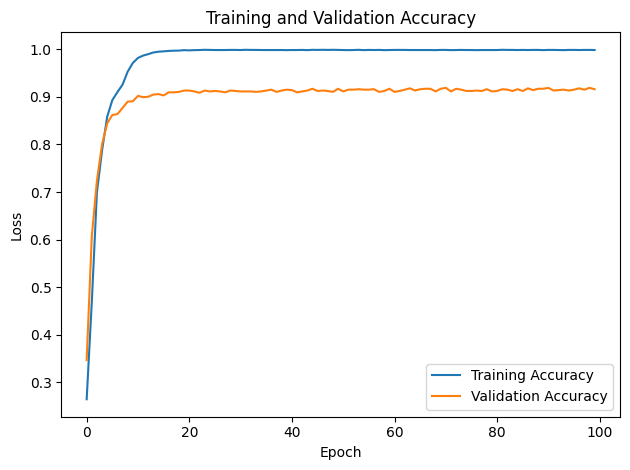

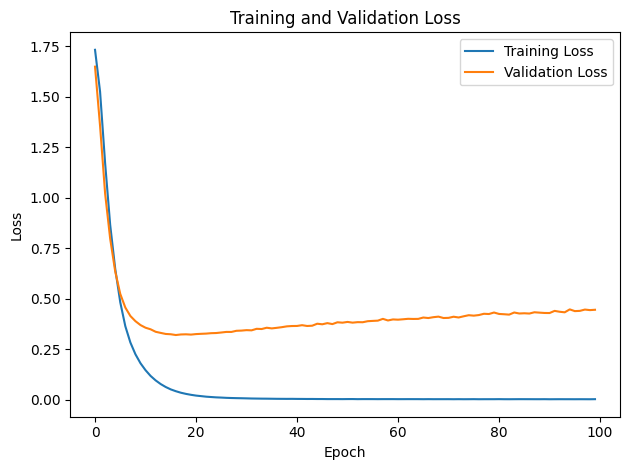

In [21]:
# Evaluate Neural Network Model
plot_accuracy(history)
plot_loss(history)

In [23]:
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)


# Print classification report
print(classification_report(y_test, y_pred_classes))

42/42 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       222
           1       0.92      0.89      0.90       172
           2       0.92      0.97      0.94       324
           3       0.96      0.96      0.96       219
           4       0.93      0.92      0.93       326
           5       0.80      0.71      0.75        77

    accuracy                           0.92      1340
   macro avg       0.91      0.89      0.90      1340
weighted avg       0.92      0.92      0.92      1340



In [25]:
label_encoder.classes_

array(['biiznasii', 'fayyaa', 'idil_addunyaa', 'ispoortii',
       'oduu_biyya_keessaa', 'teeknooloojii'], dtype=object)

In [26]:
accuracy_score(y_test, y_pred_classes)

0.9216417910447762

In [27]:
# Technology has the least F1-Score (0.75), idil_addunyaa 